In [2]:
import cv2 as cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

%matplotlib inline


In [3]:
Images = []
def readImagesFromFile(path):
    for filename in glob.glob(path):
        img = cv2.imread(filename)  # cv2.imread reads images in RGB format
        Images.append(img)
    return Images


In [4]:
def HV(bw):
    # _,bw = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(bw, 50, 150, apertureSize=3)
    horizontal = np.copy(edges)
    vertical = np.copy(edges)
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # print(horizontal_size)
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(
        cv2.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(
        cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)

    return horizontal,vertical


In [5]:
f = open("test.txt", "a")

pathes = [
    "./ACDB/ACdata_base/1/*",
    "./ACDB/ACdata_base/2/*",
    "./ACDB/ACdata_base/3/*",
    "./ACDB/ACdata_base/4/*",
    "./ACDB/ACdata_base/5/*",
    "./ACDB/ACdata_base/6/*",
    "./ACDB/ACdata_base/7/*",
    "./ACDB/ACdata_base/8/*",
    "./ACDB/ACdata_base/9/*"
]
for path in pathes:
    i= 0
    HIMG = []
    VIMG = []
    Images = []
    print(path)
    f.write(path)
    f.write('\n')

    Images = readImagesFromFile(path)
    print(len(Images))
    for img in Images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, bw = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        try:
            h,v = HV(bw)
            HIMG.append(h)
            VIMG.append(v)
        except:
            i +=1
    print("number of error images : ", i)
    f.write("number of error images : " )
    f.write(str(i))
    f.write('\n')
    # print("num",len(HIMG),len(VIMG))
    vNumber = []
    hNumber = []
    for img in HIMG:
        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        num_labels, labels = cv2.connectedComponents(img)
        vNumber.append(num_labels)
    for img in VIMG:
        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        num_labels, labels = cv2.connectedComponents(img)
        hNumber.append(num_labels)
    feature = []
    for i in range(0, len(vNumber)):
        feature.append(vNumber[i]/hNumber[i])
    feature = np.array(feature)
    print("number of images",len(vNumber))
    f.write("number of images :")
    f.write(str(len(vNumber)))
    f.write('\n')
    print("number of images that not exceeded the  0.5 ratio :",len(feature[feature < 0.5]))
    f.write("number of images that not exceeded the  0.5 ratio :")
    f.write(str(len(feature[feature < 0.5])))
    f.write('\n')
    print("percentage of Images exceeded the ratio ",
          (1-(len(feature[feature < 0.5])/len(vNumber)))*100,"%")
    f.write("percentage of Images exceeded the ratio ")
    f.write(str((1-(len(feature[feature < 0.5])/len(vNumber)))*100))
    f.write("%")
    f.write('\n')

f.close()


./ACDB/ACdata_base/1/*
190
number of error images :  0
number of images 190
number of images that not exceeded the  0.5 ratio : 190
percentage of Images exceeded the ratio  0.0 %
./ACDB/ACdata_base/2/*
190
number of error images :  0
number of images 190
number of images that not exceeded the  0.5 ratio : 182
percentage of Images exceeded the ratio  4.210526315789476 %
./ACDB/ACdata_base/3/*
180
number of error images :  0
number of images 180
number of images that not exceeded the  0.5 ratio : 173
percentage of Images exceeded the ratio  3.888888888888886 %
./ACDB/ACdata_base/4/*
185
number of error images :  0
number of images 185
number of images that not exceeded the  0.5 ratio : 179
percentage of Images exceeded the ratio  3.2432432432432434 %
./ACDB/ACdata_base/5/*
195
number of error images :  0
number of images 195
number of images that not exceeded the  0.5 ratio : 189
percentage of Images exceeded the ratio  3.076923076923077 %
./ACDB/ACdata_base/6/*
180
number of error image

./ACDB/ACdata_base/1/*
190


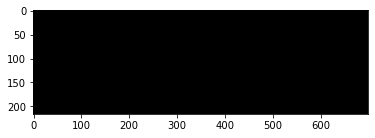

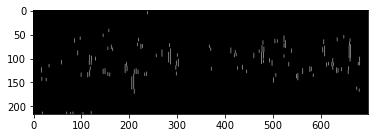

./ACDB/ACdata_base/2/*
190


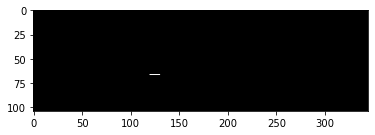

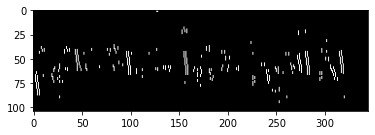

./ACDB/ACdata_base/3/*
180


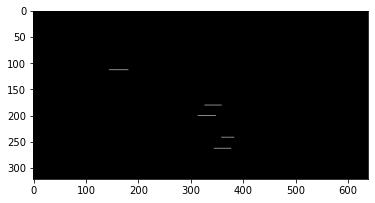

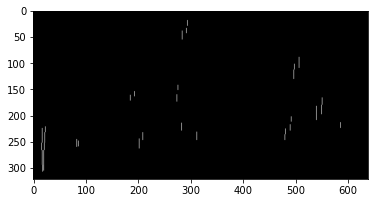

./ACDB/ACdata_base/4/*
185


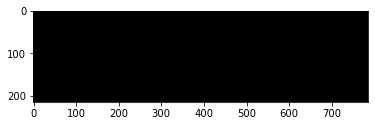

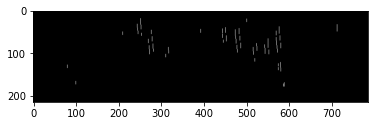

./ACDB/ACdata_base/5/*
195


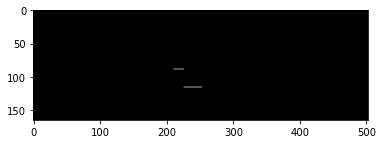

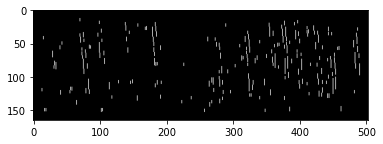

./ACDB/ACdata_base/6/*
180


error: OpenCV(4.5.3) c:\users\runneradmin\appdata\local\temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\filterengine.hpp:367: error: (-215:Assertion failed) anchor.inside(Rect(0, 0, ksize.width, ksize.height)) in function 'cv::normalizeAnchor'


In [18]:
import helpers
import preprocessing
import extract_features
def LVL(_gray_image,isTextBlack):
    img_bin = preprocessing.binarization(_gray_image, isTextBlack)
    img_skeleton = preprocessing.skeletonization(img_bin)
    bw = np.uint8(img_bin)*255  # 0 ,1
    edges = cv2.Canny(bw, 50, 150, apertureSize=3)
    vertical = np.copy(edges)
    vertical2 = np.copy(img_skeleton)
    # Show extracted horizontal lines
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = max(rows // 30, 2)
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(
        cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    verticalEdge = cv2.dilate(vertical, verticalStructure)
    vertical2 = cv2.erode(vertical2, verticalStructure)
    verticalSke = cv2.dilate(vertical2, verticalStructure)
    return verticalEdge, verticalSke

f = open("test.txt", "a")
pathes = [
    "./ACDB/ACdata_base/1/*",
    "./ACDB/ACdata_base/2/*",
    "./ACDB/ACdata_base/3/*",
    "./ACDB/ACdata_base/4/*",
    "./ACDB/ACdata_base/5/*",
    "./ACDB/ACdata_base/6/*",
    "./ACDB/ACdata_base/7/*",
    "./ACDB/ACdata_base/8/*",
    "./ACDB/ACdata_base/9/*"
]
for path in pathes:
    i = 0
    Edgeres = []
    Skeres = []
    Images = []
    print(path)
    f.write(path)
    f.write('\n')

    Images = readImagesFromFile(path)
    print(len(Images))
    for img in Images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        h, v = HV(gray)
        Edgeres.append(h)
        Skeres.append(v)
    f.write("number of error images : ")
    f.write(str(i))
    f.write('\n')
    plt.imshow(Edgeres[0],cmap="gray")
    plt.show()
    plt.imshow(Skeres[0], cmap="gray")
    plt.show()
    # print("num",len(Edgeres),len(Skeres))
    # vNumber = []
    # hNumber = []
    # for img in Edgeres:
    #     # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #     num_labels, labels = cv2.connectedComponents(img)
    #     vNumber.append(num_labels)
    # for img in Skeres:
    #     # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #     num_labels, labels = cv2.connectedComponents(img)
    #     hNumber.append(num_labels)
    # feature = []
    # for i in range(0, len(vNumber)):
    #     feature.append(vNumber[i]/hNumber[i])
    # feature = np.array(feature)
    # print("number of images", len(vNumber))
    # f.write("number of images :")
    # f.write(str(len(vNumber)))
    # f.write('\n')
    # print("number of images that not exceeded the  0.5 ratio :",
    #       len(feature[feature < 0.5]))
    # f.write("number of images that not exceeded the  0.5 ratio :")
    # f.write(str(len(feature[feature < 0.5])))
    # f.write('\n')
    # print("percentage of Images exceeded the ratio ",
    #       (1-(len(feature[feature < 0.5])/len(vNumber)))*100, "%")
    # f.write("percentage of Images exceeded the ratio ")
    # f.write(str((1-(len(feature[feature < 0.5])/len(vNumber)))*100))
    # f.write("%")
    # f.write('\n')

f.close()
